# 머신러닝(machine learning)
- 기계(컴퓨터 알고리즘) 스스로 데이터를 학습하여 서로 다른 변수 간의 관계를 찾아가는 과정
- 해결하는 문제에 따라 예측(prediction), 분류 (classiification), 군집(clustering) 알고리즘으로 분류

## 지도학습 vs 비지도 학습
- 지도학습 (supervised learning) : 정답 데이터를 다른 데이터와 함께 컴퓨터 알고리즘에 입력하는 방식, 회귀분석, 분류등이 있음
- 비지도 학습 (unsupervised learning) : 정답데이터 없이 컴퓨터 알고리즘 스스로 데이터로 부터 숨은 패턴을 찾아내는 방식, 군집분석이 있음

### 머신러닝 프로세스
데이터 정리 -> 데이터분리(훈련,검증) -> 알고리즘 준비 -> 모형학습 -> 예측 -> 모형평가 -> 모형활용

### 회귀분석
- 가격, 매출, 주가, 환율, 수량 등 연속적인 값을 갖는 연속 변수를 예측하는데 주로 사용

#### 단순 회귀 분석
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘으로 대표적인 지도 학습 유형이다.
- x와 y에 대한 정보를 갖고 일차발정식의 계수 a,b 를찾는 과정(y = ax+b)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Data/auto-mpg.csv',header=None)
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [3]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### 데이터 탐색

In [4]:
# 데이터의 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
# 데이터통계 요약정보 확인
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
# horsepower 열의 자료형 변경 (문자열 -> 숫자)
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [7]:
df['horsepower'].replace('?',np.nan,inplace=True)
df.dropna(subset=['horsepower'],axis = 0,inplace=True)
df['horsepower'] = df['horsepower'].astype('float')
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### 속성 선택

In [8]:
# 분석에 활용할 열(속성)을 선택(연비,실린더,출력,중량)
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


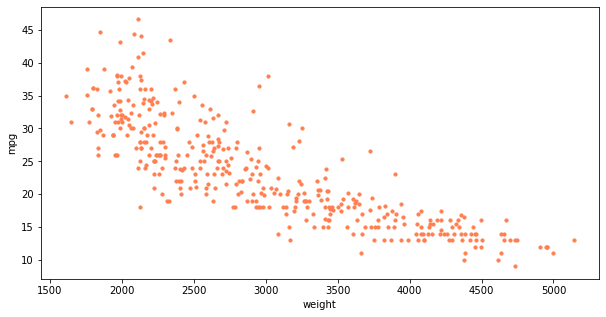

In [9]:
# 종속 변수 y: mpg와 다른 변수 간의 선형 관계를 산점도로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter',
         x='weight',
         y='mpg',
         c='coral',
         figsize=(10,5),
         s=10
        )
plt.show()

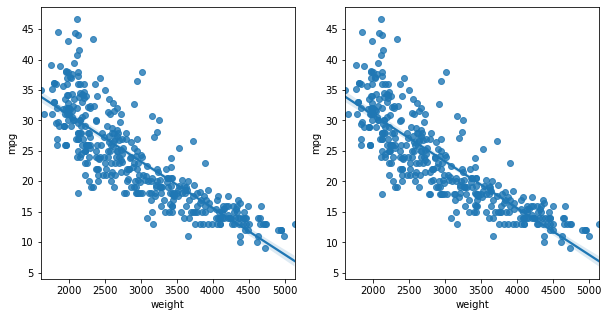

In [10]:
# seaborn 으로 산점도 그리기
fig = plt.figure(figsize = (10,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

sns.regplot(x='weight',y='mpg',data=ndf,ax=ax1) # 회귀선 표기
sns.regplot(x='weight',y='mpg',data=ndf,ax=ax2) # 회귀선 표기 안함

plt.show()

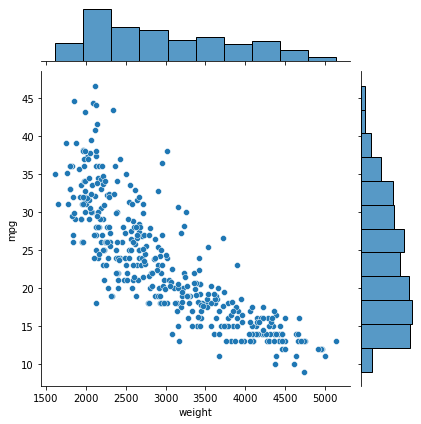

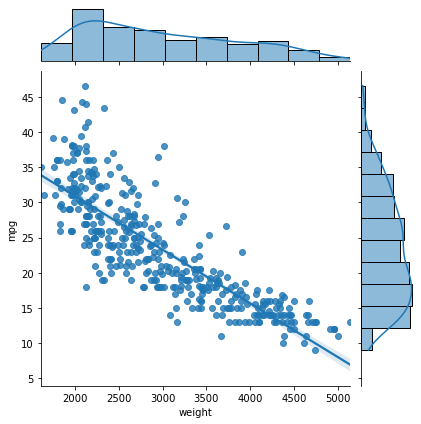

In [11]:
# seaborn 조인트 그래프 : 산점도, 히스토그램
sns.jointplot(x='weight',y='mpg',data=ndf)# 회귀선 표기
sns.jointplot(x='weight',y='mpg',data=ndf,kind='reg')# 회귀선 표기 안함
plt.show()

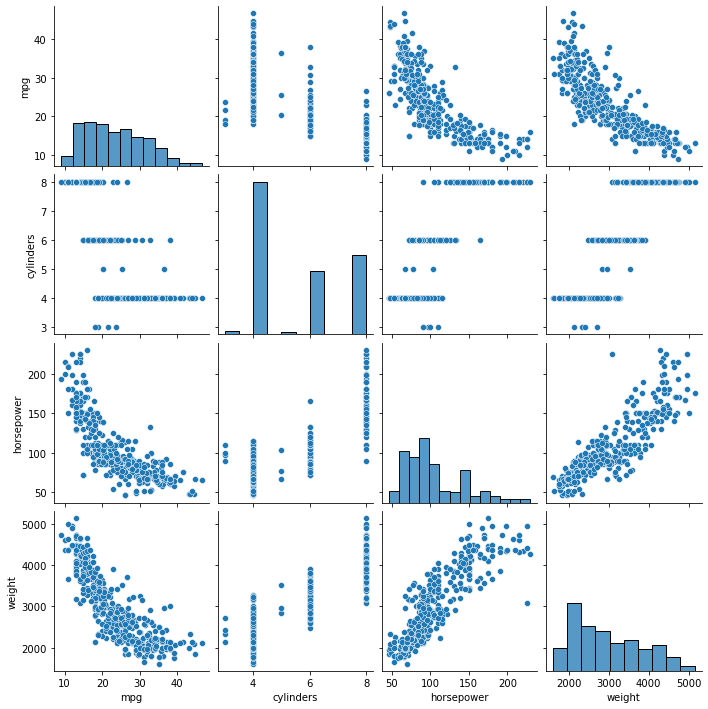

In [12]:
# seaborn pairplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)
plt.show()
plt.close()

In [24]:
# 변수(속성) 선택 
X = ndf[['weight']] # 독립변수 x
y = ndf['mpg'] # 독립변수 y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, # 독립변수
                                                    y, # 종속변수
                                                    test_size = 0.3, # 검증 30%
                                                    random_state=10 # 랜덤추출값
                                                   )
print("train data 개수", len(X_train))



train data 개수 274


In [25]:
# sklearn에서 선형회귀분석 모듈 가져오기 
from sklearn.linear_model import LinearRegression

In [26]:
# 단쉬 회귀 분석 모델 생성 
lr = LinearRegression()

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
# 학습을 마친 모형에 테스트 데이터 적용하여 결정계수 계산
r_square = lr.score(X_test, y_test)
r_square

0.6822458558299325

In [31]:
# 회귀식의 기울기 
print("기울기 a:", lr.coef_)

기울기 a: [-0.00775343]


In [32]:
# 회귀식의 절편
print("절편 b:", lr.intercept_)

절편 b: 46.710366257280086


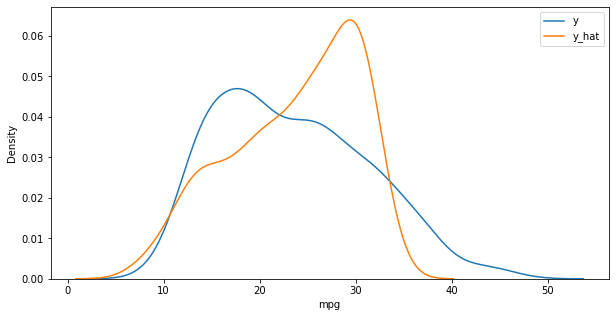

In [34]:
# 모형 전체에 X 데이터를 입력하여 예측한 y_hat을 실제 Y값과 비교 
y_hat = lr.predict(X)
plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y, label = 'y')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax = ax1)
plt.legend()
plt.show()

> 실제값은 왼쪽으로 편향되고 있고 예측값은 오른쪽으로 편중되는 경향을 보임.           
> 독립변수(weight)와 종속변수(mpg)사이에 선형관계가 있지만 모형의 오차를 더 줄일 필요가 있음.       
> 앞의 산점도를 보면 직선보다는 곡선에 더 적합해 보인다.             
>>> 비선형 회귀분석을 통해 모형의 정확도를 높일 수 있을 것 같다.

## 다항 회귀 분석 
 - 복잡한 곡선형태의 회귀선을 표현 
 - y = aX^2 +bX +c

In [35]:
# 변수(속성) 선택 
X = ndf[['weight']] # 독립변수 x
y = ndf['mpg'] # 독립변수 y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, # 독립변수
                                                    y, # 종속변수
                                                    test_size = 0.3, # 검증 30%
                                                    random_state=10 # 랜덤추출값
                                                   )
print("train data 개수", X_train.shape)



train data 개수 (274, 1)


### 모형 학습 및 검증

In [36]:
from sklearn.linear_model import LinearRegression # 선형 회귀 분석
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환 

In [37]:
# 다항식 변환 
poly = PolynomialFeatures(degree = 2) # 2차항 적용 
X_train_poly = poly.fit_transform(X_train) # X_train데이터를 2차항으로 변환 

In [38]:
print("원 데이터: ", X_train.shape)
print("2차항 변환 데이터: ", X_train_poly.shape)

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


In [39]:
# train data를 가지고 모형 학습 
pr = LinearRegression()
pr.fit(X_train_poly, y_train)


LinearRegression()

In [41]:
# 결정계수 예측력 계산 
X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
r_square

0.708700926297548

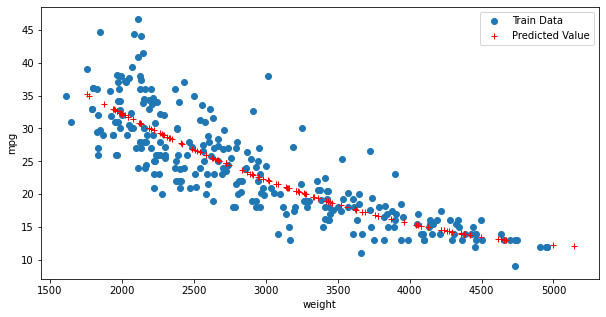

In [44]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train,'o',label="Train Data")
ax.plot(X_test, y_hat_test,'r+',label='Predicted Value') # model이 학습한 회귀선 
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

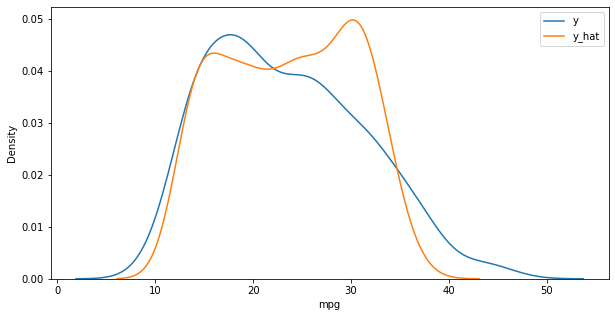

In [46]:
# 모형 전체에 X 데이터를 입력하여 예측한 y_hat을 실제 Y값과 비교 
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)
plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y, label = 'y')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax = ax1)
plt.legend()
plt.show()

> 단순회귀 분석의 결과와 비교 할때 한쪽으로 편향되는 경향이 상당히 감소하여 더 적합한 모델이라고 볼 수 있다. 

### 다중회귀분석 
 - 여러개의 독립변수가 종속변수에 영향을 줄 수 있는 경우 사용 
 - y= a1x1+a2x2+....

In [47]:
X = ndf[['cylinders','horsepower','weight']]
y = ndf['mpg']

In [48]:
# train data와 test data (7:3) 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)
print('훈련데이터 : ', X_train.shape)
print('검증데이터 : ', X_test.shape)

훈련데이터 :  (274, 3)
검증데이터 :  (118, 3)


# 모델 학습 및 검증

In [49]:
from sklearn.linear_model import LinearRegression

# 단순회귀 분석 모델 생성 
lr = LinearRegression()
# train data를 가지고 모델학습 
lr.fit(X_train, y_train)
# 예측력 
r_square=lr.score(X_test, y_test)
print(r_square)

0.6939048496695597


In [51]:
# 회귀식의 기울기 
print('X변수의 계수', lr.coef_)
# 회귀식의 절편 
print('상수항', lr.intercept_)

X변수의 계수 [-0.60691288 -0.03714088 -0.00522268]
상수항 46.41435126963407


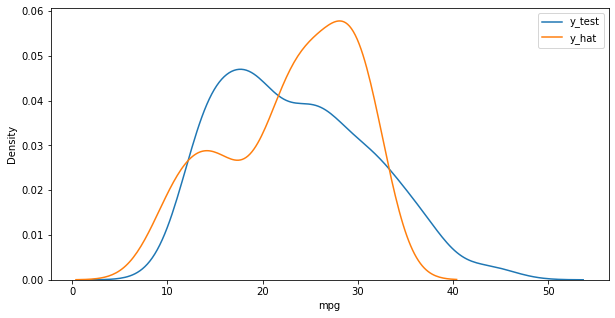

In [52]:
y_hat = lr.predict(X_test)
plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y,label='y_test')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

> 단순회귀분석의 결과와 비교하면 어느 한쪽으로 편향되는 경향은 그대로 남아 있지만,              
> 그래프의 첨도(뾰족한 정도)가 누그러진 것을 볼 수 있다.

# 분류
# KNN 
 - 가장 이웃한 값으로 분류

In [53]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [55]:
# NaN값이 많은 deck열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제 
rdf = df.drop(['deck', 'embark_town'], axis=1)
rdf.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alive', 'alone'],
      dtype=object)

In [56]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
len(rdf)

714

In [57]:
# embarked 열의 NaN값을 승선 도시 중에서 가장 많이 출현한 값으로 치환하기 
most_freq=rdf['embarked'].value_counts(dropna=True).idxmax()
most_freq

'S'

In [58]:
rdf['embarked'].fillna(most_freq, inplace=True)

In [63]:
# 분석에 활용한 열을 선택 
ndf = rdf[['survived','pclass','sex','age','sibsp','parch','embarked']]
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [64]:
# OnehotEncoding = 범주형 데이터를 모형이 인식할수 있도록 숫자형 으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf,onehot_sex], axis=1)
ndf

,survived,pclass,sex,age,sibsp,parch,embarked,female,male
0,0,3,male,22.0,1,0,S,0,1
1,1,1,female,38.0,1,0,C,1,0
2,1,3,female,26.0,0,0,S,1,0
3,1,1,female,35.0,1,0,S,1,0
4,0,3,male,35.0,0,0,S,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q,1,0
886,0,2,male,27.0,0,0,S,0,1
887,1,1,female,19.0,0,0,S,1,0
889,1,1,male,26.0,0,0,C,0,1


In [65]:
onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf,onehot_embarked], axis=1)
ndf

,survived,pclass,sex,age,sibsp,parch,embarked,female,male,town_C,town_Q,town_S
0,0,3,male,22.0,1,0,S,0,1,0,0,1
1,1,1,female,38.0,1,0,C,1,0,1,0,0
2,1,3,female,26.0,0,0,S,1,0,0,0,1
3,1,1,female,35.0,1,0,S,1,0,0,0,1
4,0,3,male,35.0,0,0,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q,1,0,0,1,0
886,0,2,male,27.0,0,0,S,0,1,0,0,1
887,1,1,female,19.0,0,0,S,1,0,0,0,1
889,1,1,male,26.0,0,0,C,0,1,1,0,0


In [66]:
ndf.drop(['sex','embarked'], axis=1, inplace=True)
ndf

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,1,0,0,1,0
886,0,2,27.0,0,0,0,1,0,0,1
887,1,1,19.0,0,0,1,0,0,0,1
889,1,1,26.0,0,0,0,1,1,0,0


# 훈련/검증 데이터 분할

In [67]:
# 변수 선택 
X=ndf[['pclass','age','sibsp','parch','female','male','town_C','town_Q','town_S']]
y=ndf['survived']

In [68]:
# 정규화 
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X)

In [71]:
# train data, test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)
print("train 개수 : ", X_train.shape)
print("test 개수 : ", X_test.shape)

train 개수 :  (499, 9)
test 개수 :  (215, 9)


In [74]:
# 모델 학습 및 검증 
from sklearn.neighbors import KNeighborsClassifier

# 모델 객체 생성(k=5)
knn=KNeighborsClassifier(n_neighbors=5)

# 학습 
knn.fit(X_train, y_train)

# 예측 
y_hat = knn.predict(X_test)
print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [75]:
# 모델 성능 평가: Cofusion Matrix 계산 
from sklearn import metrics
knn_matrix =metrics.confusion_matrix(y_test,y_hat)
print(knn_matrix)

[[109  16]
 [ 25  65]]


> 승객 215명 중        
> 사망자를 사망자로 예측 109           
> 사망자를 생존자로 예측 16          
> 생존자를 사망자로 예측 25          
> 생존자를 생존자로 예측 65            

In [76]:
# 모델 성능 평가 
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       125
           1       0.80      0.72      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



> 사망자 예측력 : 0.84      
> 생존자 예측력 : 0.76        

# SVM

In [78]:
# 모델 학습 및 검증 
from sklearn import svm 
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train) # 학습 

y_hat = svm_model.predict(X_test) # 예측 
print(y_hat[0:10]) # 예측 
print(y_test.values[0:10]) # 정답 

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [79]:
# 모델 성능 평가: Cofusion Matrix 계산 
from sklearn import metrics
svm_matrix =metrics.confusion_matrix(y_test,y_hat)
print(svm_matrix)

[[120   5]
 [ 35  55]]


> 승객 215명 중        
> 사망자를 사망자로 예측 120           
> 사망자를 생존자로 예측 5          
> 생존자를 사망자로 예측 35          
> 생존자를 생존자로 예측 55    

In [80]:
# 모델 성능 평가 
svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)

              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



> 사망자 예측력 : 0.86        
> 생존자 예측력 : 0.73
>> 전반적으로 knn, svm 예측능력과 큰 차이 없다.

# 의사결정나무(Decision Tree)

In [82]:
# 모델학습 및 검증 
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree_model.fit(X_train, y_train)
y_hat = tree_model.predict(X_test)
print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 1 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [83]:
# 모델 성능 평가 
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)

[[121   4]
 [ 35  55]]


> 승객 215명 중        
> 사망자를 사망자로 예측 121          
> 사망자를 생존자로 예측 4          
> 생존자를 사망자로 예측 35          
> 생존자를 생존자로 예측 55    

In [85]:
# 모델 성능 평가 
tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)

              precision    recall  f1-score   support

           0       0.78      0.97      0.86       125
           1       0.93      0.61      0.74        90

    accuracy                           0.82       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.84      0.82      0.81       215



---
# 군집 분석

 - 서로 비슷한 특징을 관측값끼리 같은 클러스터로 묶는 알고리즘 
 - 비지도 학습 
### k-means 
 - 몇 개의 Cluster 데이터를 구분 할 것인지 결정하는 k값에 따라 모형의 성능이 달라진다

In [87]:
# 출처 : UCI ML Respository / wholesale customers
uci_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(uci_path, header=0)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


> 도매업 고객 데이터 셋              
> 각 고객의 연간 구매금액을 상품카테고리로 구분하여 정리한 셋

In [88]:
# 데이터 자료형 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [89]:
# 데이터 통계 요약 정보 
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [92]:
X = df.iloc[:,:]
X[:5]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [93]:
# 데이터를 정규화 
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[:5]

array([[ 1.44865163,  0.59066829,  0.05293319,  0.52356777, -0.04111489,
        -0.58936716, -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197,  0.54445767,  0.17031835,
        -0.27013618,  0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926,  0.40853771, -0.0281571 ,
        -0.13753572,  0.13323164,  2.24329255],
       [-0.69029709,  0.59066829,  0.10011141, -0.62401993, -0.3929769 ,
         0.6871443 , -0.49858822,  0.09341105],
       [ 1.44865163,  0.59066829,  0.84023948, -0.05239645, -0.07935618,
         0.17385884, -0.23191782,  1.29934689]])

In [95]:
from sklearn import cluster
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(X)
# 예측 (군집)
cluster_label = kmeans.labels_
cluster_label

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 4, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 4, 0, 0, 1, 1, 0, 0, 1, 1, 4, 0, 1, 1, 0, 4, 0, 0, 1, 4,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 4, 4, 1,
       1, 1, 1, 1, 4, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 4, 3, 3, 0, 3, 0, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 0, 3, 0, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 3, 0, 0, 3, 0,

In [96]:
df['Cluster'] = cluster_label
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
